### Terminology and Diagrams

**Stock variables** are represented in a graphical model by a box. A stock variable is measured at a point in time. It may have accumulated in the past, and it may change in the future.

A **derived stock variable** is represented in a graphical model by any white circle that has an incoming arrow from a stock variable or from another derived stock variable. It is just another stock variable, so we are interested in keeping up with its value over time. The difference from a regular stock variable, however, is that it is usually based on a simple calculation from another stock variable. So it's usually enough to keep with the stock variable and use those values to obtain the derived stock value at any point in time.

An **(ordinary) variable** is represented in a graphical model by a white circle that does not have any incoming arrows from a (derived) stock variable. These are scalar variables in the simulation program. They can be constant or can change over time; however, we won't need to keep track of them over time.

A **flow** is depicted in a graphical model by a gray oval. It represents a quantity whose value will change over time, and which will influence the value of some stock variable(s). It is a dynamic scalar, meaning its value will change over time, so it will be continually computed in the main simulation.

**Quick review question 1** Consider figure 3.5.1 in the textbook. Which of the symbols in the graphical model correspond to stock variables? Ordinary variables? Derived stock variables? Flows?

### Modeling Procedure

Computationally, our simulations will consist of a loop that run through for a known amount of `time`. You can think of each run through a loop as a tick on a virtual clock, during which the variables in our system will change. When the simulation is over, we can observe the behavior of the variables in the system.

The following general procedure will be useful for writing simulations in Python:

1. Identify the **ordinary variables** -- circles with no incoming arrows. If these variables are constant, then create variables to represent each one.
2. Identify the **derived variables** -- circles whose only incoming arrows are from other circles that are already defined as variables. Create a variable to represent each one using a formula. Do this until the only remaining circles are pointed to by something other than a circle.
3. Create an array for each **stock variable**. Set the first value of the array to its initial condition.
4. Run the simulation for the specified total time. Each time through the loop.
  
  a. Determine the temporary values of any flows and remaining ordinary variables. These values could be based on an equation that takes other current values of variables, or it could be a special value based on the current time or other things. For instance, a "pulse," or "shock," variable that depends on time.
  
  b. Set the next value for each array to its new value on the next clock tick.

5. If you wish to examine any **derived stock variables**, create them now.
6. Plot any variables of interest.

## Solving Differential Equations

### Unconstrained Growth

Initial population of 100, rate of change of the population is 10%. This suggests the following **differential equation**

$$\frac{dP}{dt}=0.1P$$

$$P_{0}=100$$

#### Imports

In [7]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

In [8]:
popul_0 = 100

In [9]:
dt = .1 # every 1/10 of, say, an hour

In [10]:
def dPdt(popul, t, rate=.1):
    return rate*popul

In [11]:
time_points = np.arange(0, 12, dt)

In [12]:
growth_rate = .1

In [13]:
growth = integrate.odeint(dPdt, popul_0, time_points, args=(growth_rate,))

In [14]:
growth2 = integrate.odeint(dPdt, popul_0, time_points, args=(.2,))

In [15]:
fig, ax = plt.subplots(figsize=(10,6), 
                        subplot_kw=dict(xlabel="Time", 
                                        ylabel="Population"))
ax.plot(time_points, growth, label="Growth Rate - .1");
ax.plot(time_points, growth2, 'r', label="Growth Rate - .2");
ax.legend()

### Aside: Testing

Testing is **important** in almost any setting in which you're going to be writing code.

In [16]:
def popul(growth_rate, time_points, init_pop):
    growth = init_pop * np.exp(growth_rate*time_points)
    if growth.ndim == 1:
        growth = growth[:,None]
    return growth

In [17]:
known_growth = popul(growth_rate, time_points, popul_0)

In [18]:
np.max(np.abs(known_growth - growth))

5.0755487563947099e-06

In [19]:
np.testing.assert_almost_equal(growth, known_growth, 5)

### Under the Hood

In [20]:
growth_res = integrate.odeint(dPdt, popul_0, time_points, 
                              args=(growth_rate,), full_output=True)

In [21]:
growth_res[1]

{'hu': array([ 0.04019281,  0.12646782,  0.12646782,  0.12646782,  0.12646782,
         0.12646782,  0.25293565,  0.25293565,  0.25293565,  0.25293565,
         0.25293565,  0.25293565,  0.25293565,  0.25293565,  0.25293565,
         0.25293565,  0.25293565,  0.25293565,  0.62837662,  0.62837662,
         0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
         0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
         0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
         0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
         0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
         0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
         0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
         0.62837662,  1.2068562 ,  1.2068562 ,  1.2068562 ,  1.2068562 ,
         1.2068562 ,  1.2068562 ,  1.2068562 ,  1.2068562 ,  1.2068562 ,
         1.2068562 ,  1.2068562 ,  1.2068562 

In [22]:
time_points

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
        10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
        11.7,  11.8,  11.9])

In [23]:
len(growth_res)

2

In [24]:
growth_res[1].keys()

dict_keys(['hu', 'tcur', 'tolsf', 'tsw', 'nst', 'nfe', 'nje', 'nqu', 'imxer', 'lenrw', 'leniw', 'mused', 'message'])

In [25]:
growth_res[1]["hu"]

array([ 0.04019281,  0.12646782,  0.12646782,  0.12646782,  0.12646782,
        0.12646782,  0.25293565,  0.25293565,  0.25293565,  0.25293565,
        0.25293565,  0.25293565,  0.25293565,  0.25293565,  0.25293565,
        0.25293565,  0.25293565,  0.25293565,  0.62837662,  0.62837662,
        0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
        0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
        0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
        0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
        0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
        0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
        0.62837662,  0.62837662,  0.62837662,  0.62837662,  0.62837662,
        0.62837662,  1.2068562 ,  1.2068562 ,  1.2068562 ,  1.2068562 ,
        1.2068562 ,  1.2068562 ,  1.2068562 ,  1.2068562 ,  1.2068562 ,
        1.2068562 ,  1.2068562 ,  1.2068562 ,  0.98859529,  0.98

**See also** [`scipy.integrate.ode`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html#scipy.integrate.ode). We will discuss this in greater detail in the future. There are also the [PyDSTool](http://www.ni.gsu.edu/~rclewley/PyDSTool/FrontPage.html) package, [PyGSL](http://pygsl.sourceforge.net/reference/pygsl/index.html) wrappers, and [FuncDesigner](http://www.openopt.org/FuncDesigner) as part of the [OpenOpt](http://openopt.org/Welcome) suite.

### Constrained Growth

$$\frac{dP}{dt}=r\left(1-\frac{P}{M}\right)P$$

In [26]:
def dPdt_constrained(popul, t, capacity=1000., rate=.1):
    return rate*(1-popul/capacity)*popul

In [27]:
capacity = 1000.
popul_0 = 20.
growth_rate = 1.05
time_points = np.arange(0, 15, .1)

In [28]:
growth = integrate.odeint(dPdt_constrained, popul_0, time_points, 
                            args=(capacity, growth_rate))

In [29]:
growth2 = integrate.odeint(dPdt_constrained, popul_0, time_points, 
                            args=(capacity, .5))

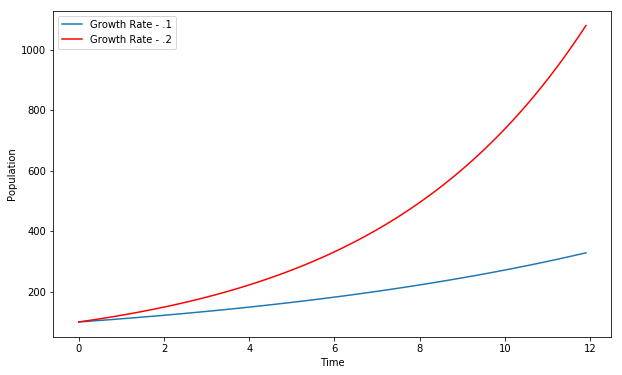

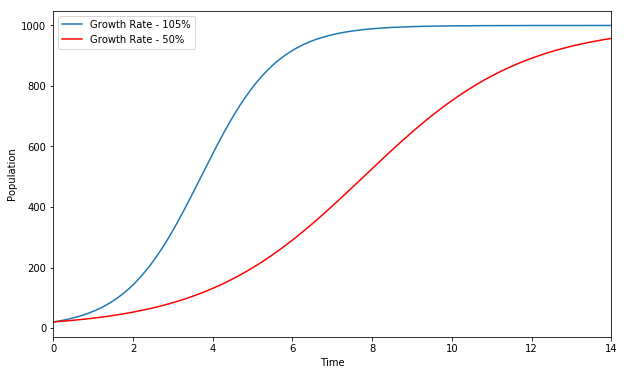

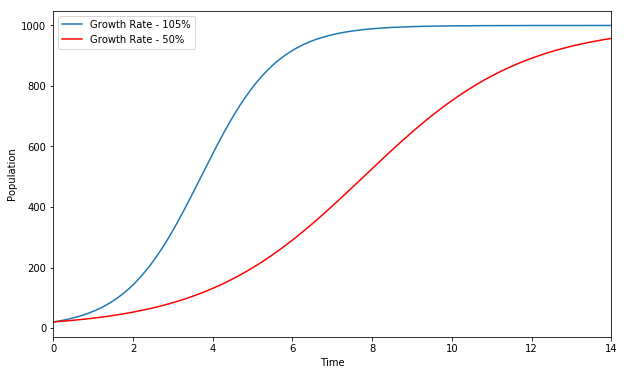

In [31]:
fig, ax = plt.subplots(figsize=(10,6), subplot_kw=dict(xlabel="Time", ylabel="Population"))
ax.plot(time_points, growth, label="Growth Rate - 105%");
ax.plot(time_points, growth2, 'r', label="Growth Rate - 50%");
ax.set_xlim(0, 14)
ax.legend(loc="upper left")
plt.show()

**Review Question** Graph the logistic equation, where the initial population is 1500, carrying capacity is 1000, and the instantaneous rate of births is 50%.